<h1><center><font color=black>P - 181 : Reliance Industries Stock Forecast</font></center></h1>

<img src="stock-market-today-070220.jpg">

<h1><center><font color=black>Business Objective</font></center></h1>

To Predict the Reliance Industries Stock Price for the next 30 days.
There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2022 
for Reliance Industries stock.

<h1><center><font color=blue>Import Libraries</font></center></h1>

In [1]:
import yfinance as yf

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import plotly.express as pe

from scipy import stats

import numpy as np

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.models import Sequential

import copy

import math

import warnings
warnings.filterwarnings('ignore')

<h1><center><font color=blue>Import Datasets</font></center></h1>

In [2]:
stock = yf.download('RELIANCE.NS' ,start='2015-1-1').round(4)
stock

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-01   438.9888   441.8121   437.6763   439.7813   417.9889   1367720
2015-01-02   439.8804   443.8181   437.9982   438.6173   416.8826   3383424
2015-01-05   438.3449   441.2672   432.9461   433.8129   412.3162   4662967
2015-01-06   430.9153   432.4013   412.0938   414.1245   393.6035   8596809
2015-01-07   414.6198   425.3680   414.5703   423.1391   402.1713   9562421
...               ...        ...        ...        ...        ...       ...
2023-03-15  2284.1001  2298.3000  2227.3999  2237.0500  2237.0500  10027725
2023-03-16  2243.0000  2254.0000  2202.2000  2225.8999  2225.8999   8474595
2023-03-17  2244.7500  2251.9500  2212.7000  2223.1001  2223.1001  15697554
2023-03-20  2215.0000  2220.0000  2180.0000  2201.2500  2201.2500   9010595
2023-03-21  2218.9500  2274.0000  2217.0000  2269.7000  2269.7000   9876263

[2031 rows x 6 columns]

### Data is taken from 2015 to Current Date

## <h1><center><font color=blue>Data Understanding</font></center></h1>

In [3]:
stocks = stock.reset_index(inplace=False) # converting date from index to columns
stocks

Date       Open       High        Low      Close  Adj Close  \
0    2015-01-01   438.9888   441.8121   437.6763   439.7813   417.9889   
1    2015-01-02   439.8804   443.8181   437.9982   438.6173   416.8826   
2    2015-01-05   438.3449   441.2672   432.9461   433.8129   412.3162   
3    2015-01-06   430.9153   432.4013   412.0938   414.1245   393.6035   
4    2015-01-07   414.6198   425.3680   414.5703   423.1391   402.1713   
...         ...        ...        ...        ...        ...        ...   
2026 2023-03-15  2284.1001  2298.3000  2227.3999  2237.0500  2237.0500   
2027 2023-03-16  2243.0000  2254.0000  2202.2000  2225.8999  2225.8999   
2028 2023-03-17  2244.7500  2251.9500  2212.7000  2223.1001  2223.1001   
2029 2023-03-20  2215.0000  2220.0000  2180.0000  2201.2500  2201.2500   
2030 2023-03-21  2218.9500  2274.0000  2217.0000  2269.7000  2269.7000   

        Volume  
0      1367720  
1      3383424  
2      4662967  
3      8596809  
4      9562421  
...        ...  
2026  10027725  
2027   8474595  
2028  15697554  
2029   9010595  
2030   9876263  

[2031 rows x 7 columns]

In [4]:
type(stocks)

pandas.core.frame.DataFrame

### Data is in DataFame Method

In [5]:
stocks.shape

(2031, 7)

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2031 non-null   datetime64[ns]
 1   Open       2031 non-null   float64       
 2   High       2031 non-null   float64       
 3   Low        2031 non-null   float64       
 4   Close      2031 non-null   float64       
 5   Adj Close  2031 non-null   float64       
 6   Volume     2031 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 111.2 KB


In [7]:
stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
stocks[stocks.duplicated()]

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []

## Data has No Null Values and Duplicate Values

## <h1><center><font color=blue>Data Visualization</font></center></h1>

In [9]:
stock2=stocks.drop(['Date','Volume'],axis = 1)

<Figure size 1800x1080 with 0 Axes>

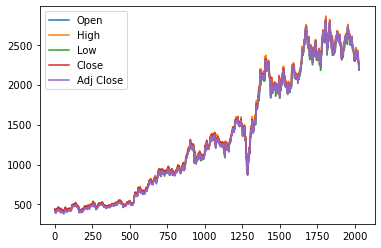

In [10]:
plt.figure(figsize=(25,15))
stock2.plot()
plt.show()

In [11]:
close = pe.line(stocks,x='Date',y='Open')
close.update_xaxes(rangeslider_visible=True)
close.show()

In [12]:
close = pe.line(stocks,x='Date',y='Close')
close.update_xaxes(rangeslider_visible=True)
close.show()

In [13]:
High= pe.line(stocks,x='Date',y='High')
High.update_xaxes(rangeslider_visible=True)
High.show()

In [14]:
low = pe.line(stocks,x='Date',y='Low')
low.update_xaxes(rangeslider_visible=True)
low.show()

In [15]:
volume = pe.line(stocks,x='Date',y='Volume')
volume.update_xaxes(rangeslider_visible=True)
volume.show()

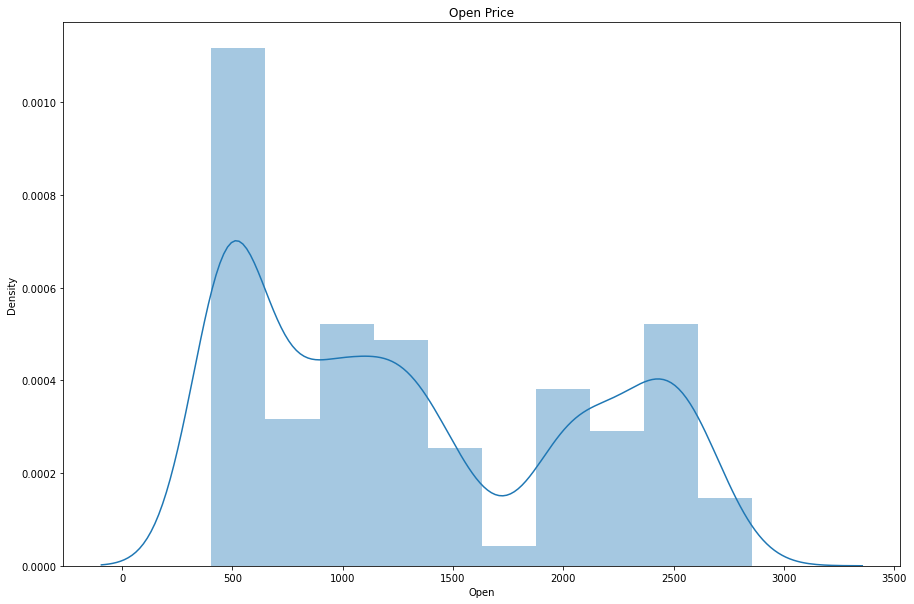

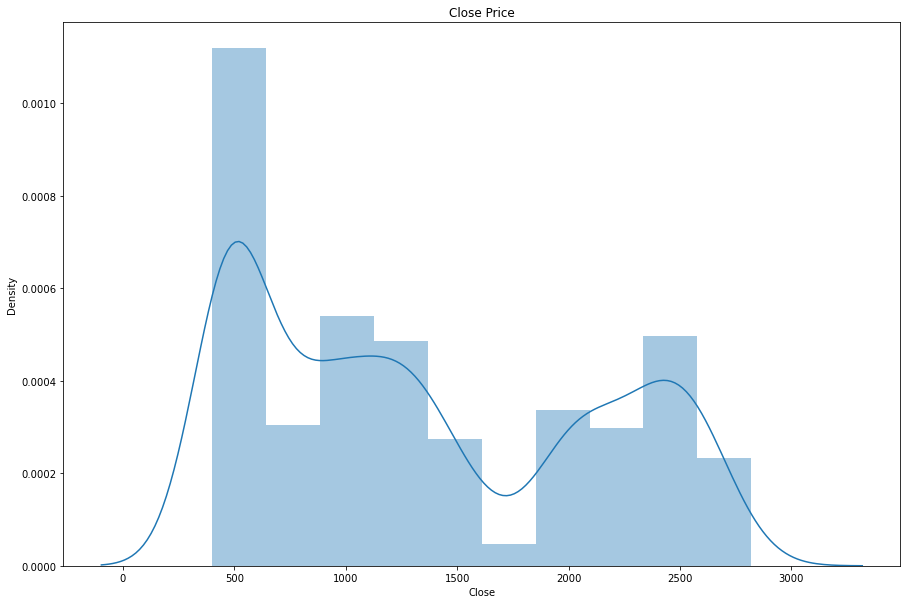

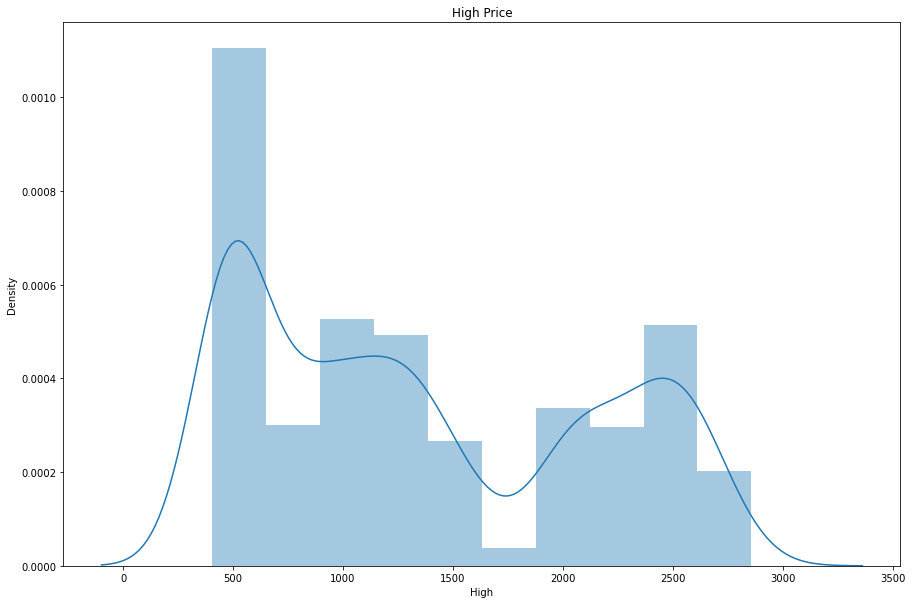

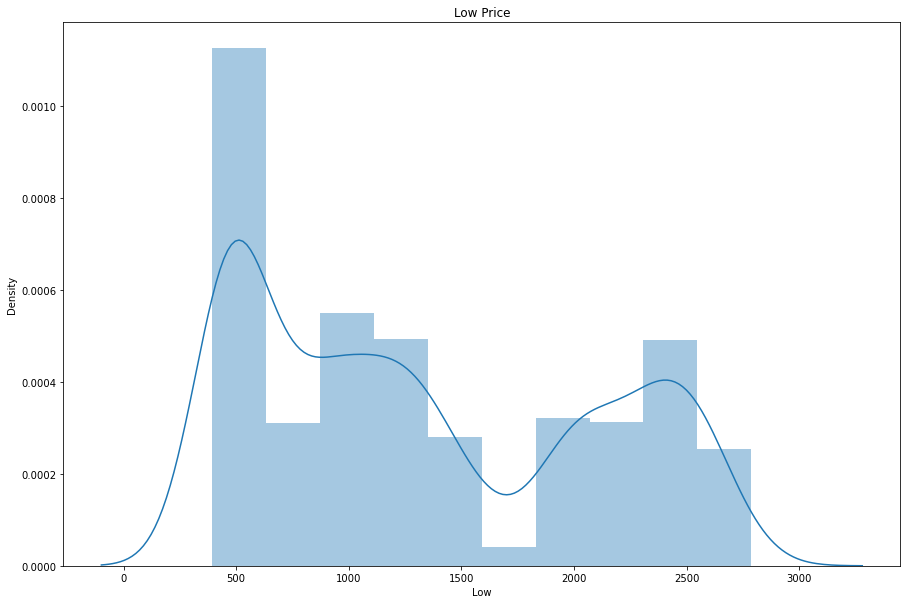

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(stocks['Open'])
plt.title('Open Price')
plt.show()
plt.figure(figsize=(15,10))
sns.distplot(stocks['Close'])
plt.title('Close Price')
plt.show()
plt.figure(figsize=(15,10))
sns.distplot(stocks['High'])
plt.title('High Price')
plt.show()
plt.figure(figsize=(15,10))
sns.distplot(stocks['Low'])
plt.title('Low Price')
plt.show()

### Most of the Price of HIgh, Low, Open, Close are near to Rs 500

In [17]:
stock1 = copy.copy(stocks)
stock1

Date       Open       High        Low      Close  Adj Close  \
0    2015-01-01   438.9888   441.8121   437.6763   439.7813   417.9889   
1    2015-01-02   439.8804   443.8181   437.9982   438.6173   416.8826   
2    2015-01-05   438.3449   441.2672   432.9461   433.8129   412.3162   
3    2015-01-06   430.9153   432.4013   412.0938   414.1245   393.6035   
4    2015-01-07   414.6198   425.3680   414.5703   423.1391   402.1713   
...         ...        ...        ...        ...        ...        ...   
2026 2023-03-15  2284.1001  2298.3000  2227.3999  2237.0500  2237.0500   
2027 2023-03-16  2243.0000  2254.0000  2202.2000  2225.8999  2225.8999   
2028 2023-03-17  2244.7500  2251.9500  2212.7000  2223.1001  2223.1001   
2029 2023-03-20  2215.0000  2220.0000  2180.0000  2201.2500  2201.2500   
2030 2023-03-21  2218.9500  2274.0000  2217.0000  2269.7000  2269.7000   

        Volume  
0      1367720  
1      3383424  
2      4662967  
3      8596809  
4      9562421  
...        ...  
2026  10027725  
2027   8474595  
2028  15697554  
2029   9010595  
2030   9876263  

[2031 rows x 7 columns]

In [18]:
stock1['Days']=stock1['Date'].dt.strftime('%d')
stock1['Months']=stock1['Date'].dt.strftime('%b')
stock1['Year']=stock1['Date'].dt.strftime('%Y')
stock1

Date       Open       High        Low      Close  Adj Close  \
0    2015-01-01   438.9888   441.8121   437.6763   439.7813   417.9889   
1    2015-01-02   439.8804   443.8181   437.9982   438.6173   416.8826   
2    2015-01-05   438.3449   441.2672   432.9461   433.8129   412.3162   
3    2015-01-06   430.9153   432.4013   412.0938   414.1245   393.6035   
4    2015-01-07   414.6198   425.3680   414.5703   423.1391   402.1713   
...         ...        ...        ...        ...        ...        ...   
2026 2023-03-15  2284.1001  2298.3000  2227.3999  2237.0500  2237.0500   
2027 2023-03-16  2243.0000  2254.0000  2202.2000  2225.8999  2225.8999   
2028 2023-03-17  2244.7500  2251.9500  2212.7000  2223.1001  2223.1001   
2029 2023-03-20  2215.0000  2220.0000  2180.0000  2201.2500  2201.2500   
2030 2023-03-21  2218.9500  2274.0000  2217.0000  2269.7000  2269.7000   

        Volume Days Months  Year  
0      1367720   01    Jan  2015  
1      3383424   02    Jan  2015  
2      4662967   05    Jan  2015  
3      8596809   06    Jan  2015  
4      9562421   07    Jan  2015  
...        ...  ...    ...   ...  
2026  10027725   15    Mar  2023  
2027   8474595   16    Mar  2023  
2028  15697554   17    Mar  2023  
2029   9010595   20    Mar  2023  
2030   9876263   21    Mar  2023  

[2031 rows x 10 columns]

In [19]:
stock3=pd.pivot_table(data=stock1,values='Close',index='Year',columns='Months').fillna(0)
stock3

Months          Apr          Aug          Dec          Feb          Jan  \
Year                                                                      
2015     435.631200   460.440248   484.915986   441.272437   434.100633   
2016     511.054328   506.053127   515.125105   474.293448   507.806500   
2017     690.166256   784.630333   910.841135   536.810247   523.760286   
2018     926.411390  1217.365343  1110.728900   913.715211   931.562900   
2019    1349.067458  1216.392330  1548.179557  1238.051363  1149.163609   
2020    1259.761483  2110.792890  1978.338636  1427.307395  1502.899674   
2021    1961.278947  2153.309510  2388.458704  2011.252505  1957.662500   
2022    2672.586858  2610.795000  2605.172741  2367.997490  2451.782540   
2023       0.000000     0.000000     0.000000  2366.524995  2472.145238   

Months          Jul          Jun          Mar          May          Nov  \
Year                                                                      
2015     500.829809   464.820100   422.823014   439.321925   470.436578   
2016     498.046515   479.852595   506.831995   478.821482   495.782633   
2017     757.028895   678.946414   632.682355   663.517323   912.338309   
2018    1059.353850   975.305076   900.336753   939.127545  1102.605890   
2019    1245.956970  1291.750226  1307.415328  1302.008255  1483.852060   
2020    1939.930435  1632.231818  1091.105029  1459.851574  1966.720000   
2021    2091.300014  2188.272705  2097.033352  1972.582500  2481.435005   
2022    2430.821433  2624.811359  2459.750000  2566.538086  2603.547629   
2023       0.000000     0.000000  2305.771421     0.000000     0.000000   

Months          Oct          Sep  
Year                              
2015     455.351220   423.801530  
2016     533.556300   526.879460  
2017     876.276265   814.197690  
2018    1090.840881  1229.146139  
2019    1372.022075  1225.439342  
2020    2161.842862  2214.381836  
2021    2631.159985  2425.345252  
2022    2437.052642  2505.081832  
2023       0.000000     0.000000

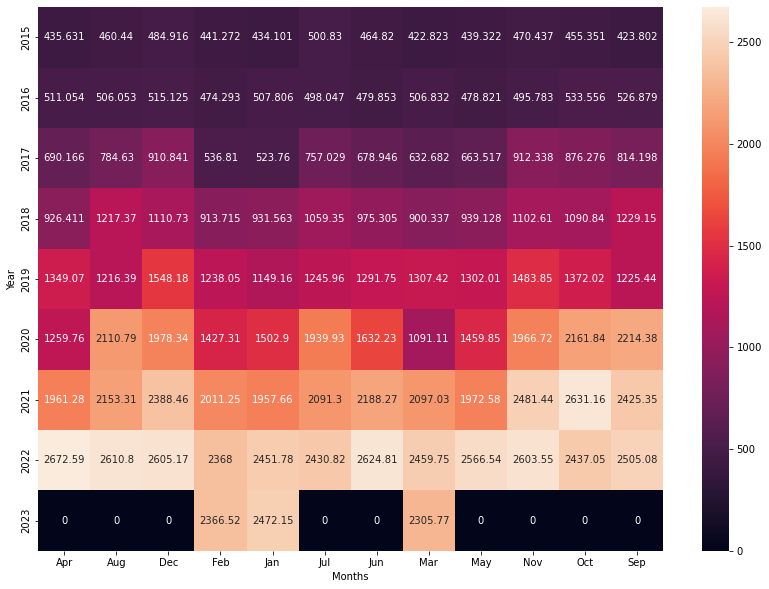

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(stock3,annot=True,fmt='g')
plt.show()

## <h1><center><font color=blue>Model Building</font></center></h1>

### Plot Dickey-Fuller test

In [21]:
rollingmean = stock.rolling(window =12).mean()
rollingstd = stock.rolling(window=12).std()


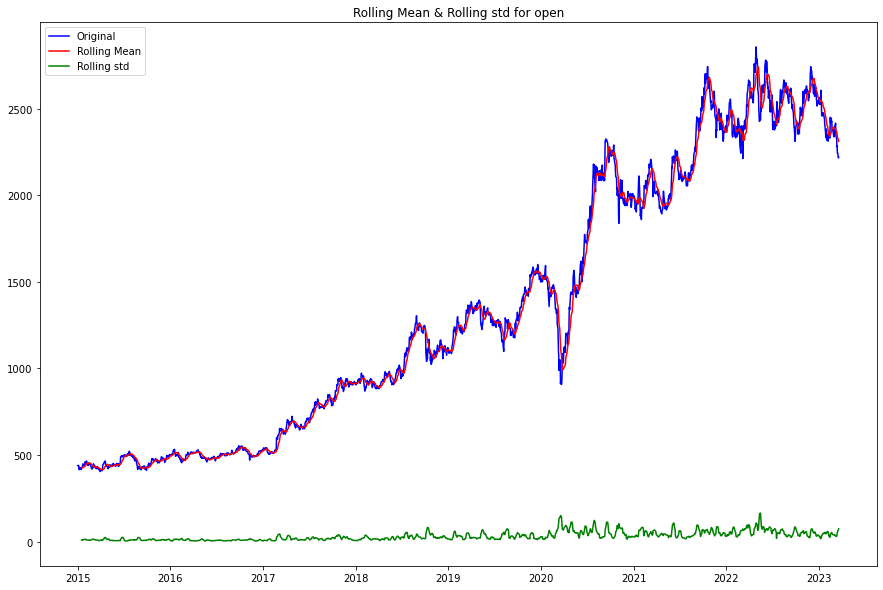

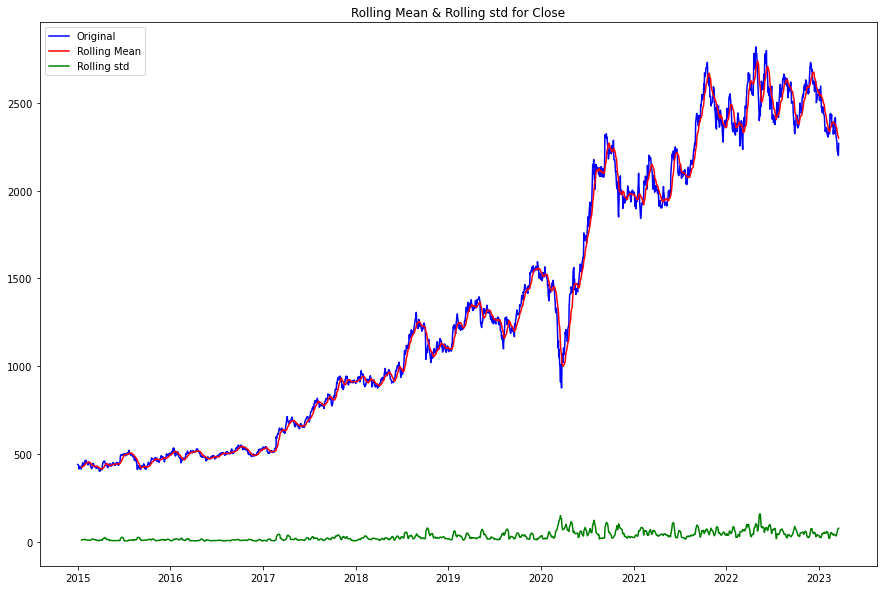

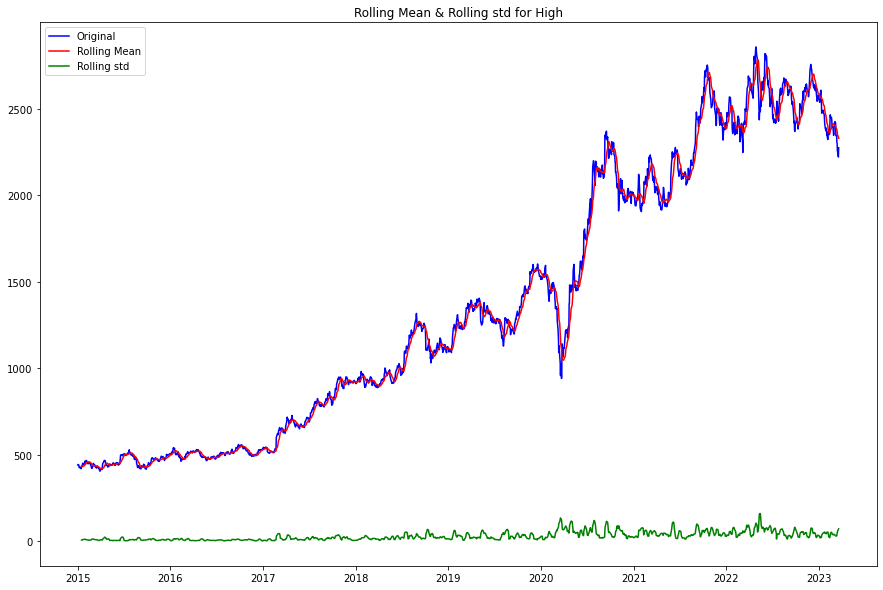

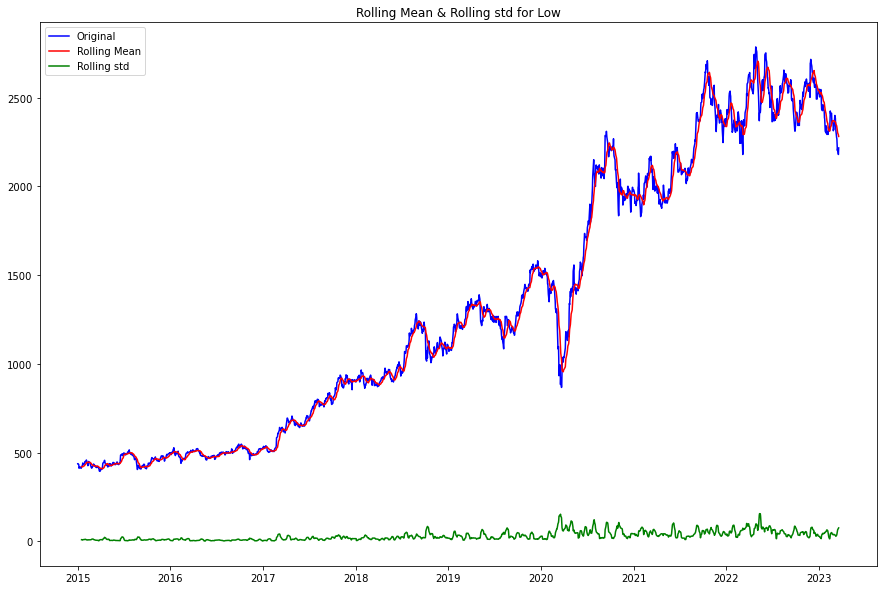

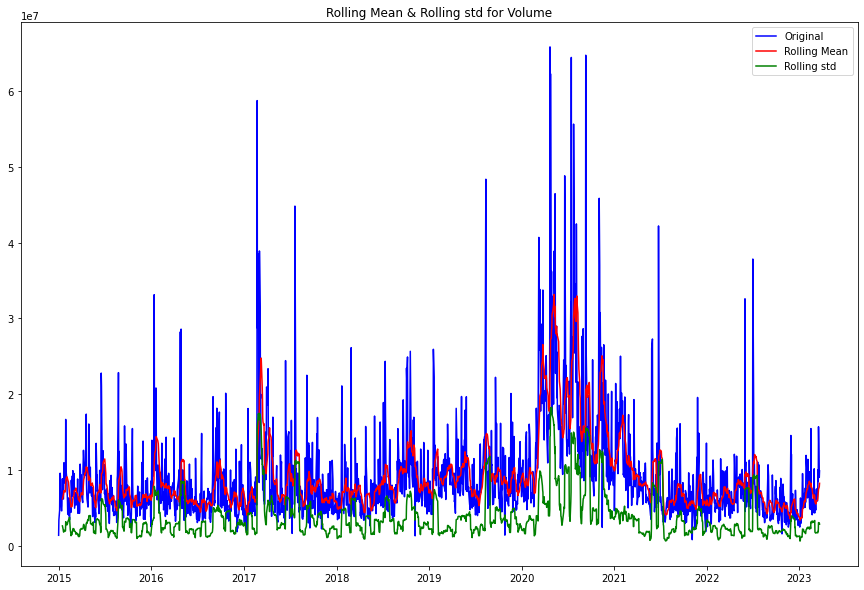

In [22]:
plt.figure(figsize=(15,10))
org = plt.plot(stock['Open'],color='blue',label='Original')
mean = plt.plot(rollingmean['Open'],color='red',label='Rolling Mean')
std = plt.plot(rollingstd['Open'],color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling std for open')
plt.show()
plt.figure(figsize=(15,10))
org = plt.plot(stock['Close'],color='blue',label='Original')
mean = plt.plot(rollingmean['Close'],color='red',label='Rolling Mean')
std = plt.plot(rollingstd['Close'],color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling std for Close')
plt.show()
plt.figure(figsize=(15,10))
org = plt.plot(stock['High'],color='blue',label='Original')
mean = plt.plot(rollingmean['High'],color='red',label='Rolling Mean')
std = plt.plot(rollingstd['High'],color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling std for High')
plt.show()
plt.figure(figsize=(15,10))
org = plt.plot(stock['Low'],color='blue',label='Original')
mean = plt.plot(rollingmean['Low'],color='red',label='Rolling Mean')
std = plt.plot(rollingstd['Low'],color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling std for Low')
plt.show()
plt.figure(figsize=(15,10))
org = plt.plot(stock['Volume'],color='blue',label='Original')
mean = plt.plot(rollingmean['Volume'],color='red',label='Rolling Mean')
std = plt.plot(rollingstd['Volume'],color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling std for Volume')
plt.show()

In [23]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(15,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

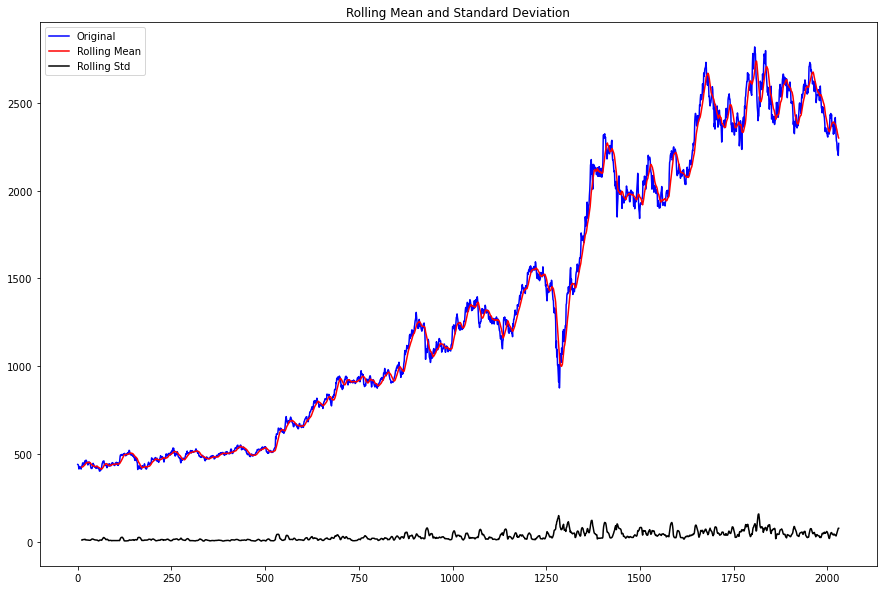

Results of dickey fuller test
Test Statistics                  -0.807836
p-value                           0.816809
No. of lags used                  3.000000
Number of observations used    2027.000000
critical value (1%)              -3.433580
critical value (5%)              -2.862967
critical value (10%)             -2.567530
dtype: float64


In [24]:
test_stationarity(stocks.Close)

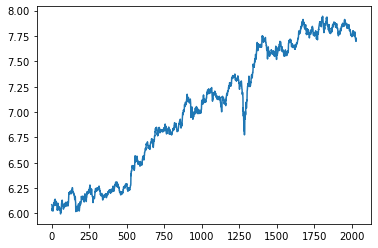

In [25]:
log_close = np.log(stocks['Close'])
plt.plot(log_close)

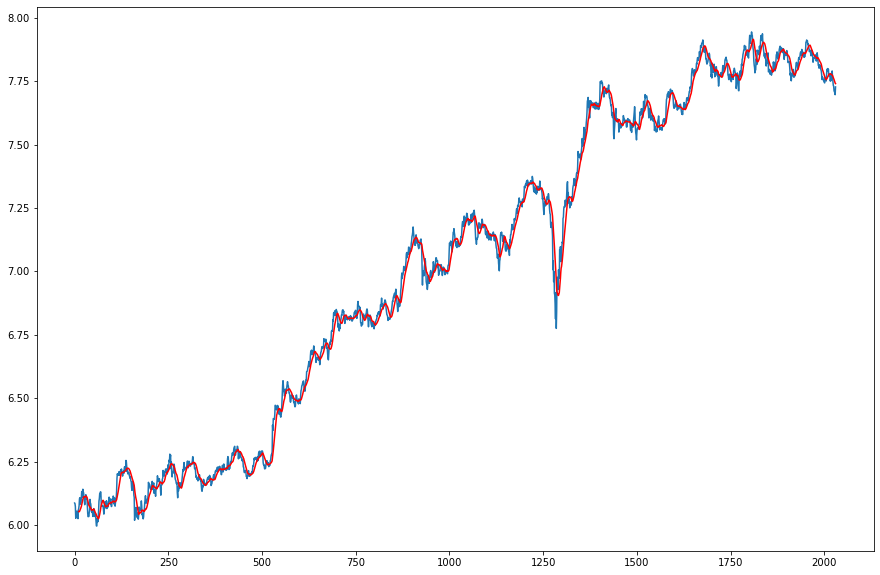

In [26]:
mov_avg = log_close.rolling(window=12).mean()
plt.figure(figsize=(15,10))
plt.plot(log_close)
plt.plot(mov_avg, color ='red')

In [27]:
diff_log_mov = log_close - mov_avg
diff_log_mov.dropna(inplace=True)
diff_log_mov

11      0.012938
12      0.025091
13      0.049714
14      0.050914
15      0.020602
          ...   
2026   -0.043720
2027   -0.043565
2028   -0.041177
2029   -0.045822
2030   -0.013156
Name: Close, Length: 2020, dtype: float64

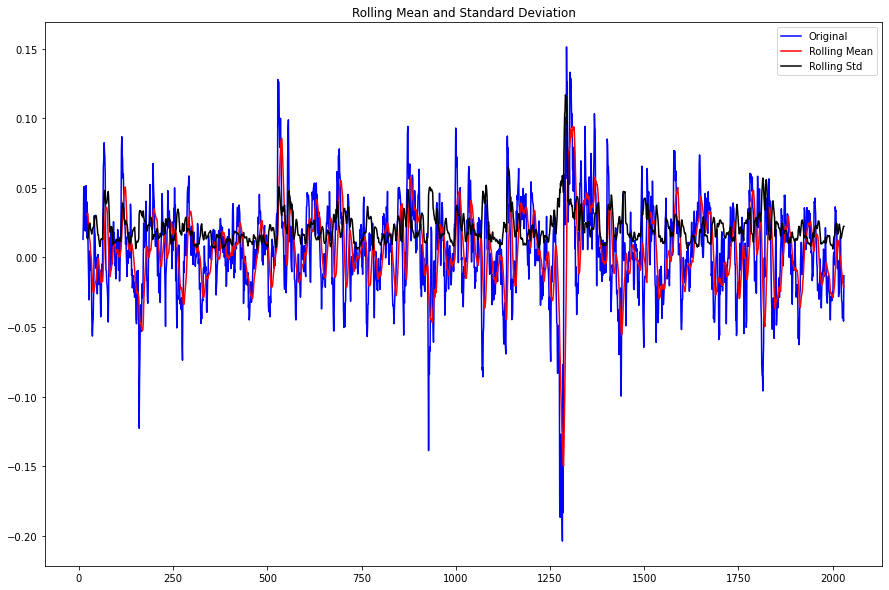

Results of dickey fuller test
Test Statistics               -1.029276e+01
p-value                        3.534722e-18
No. of lags used               1.400000e+01
Number of observations used    2.005000e+03
critical value (1%)           -3.433616e+00
critical value (5%)           -2.862983e+00
critical value (10%)          -2.567538e+00
dtype: float64


In [28]:
test_stationarity(diff_log_mov)

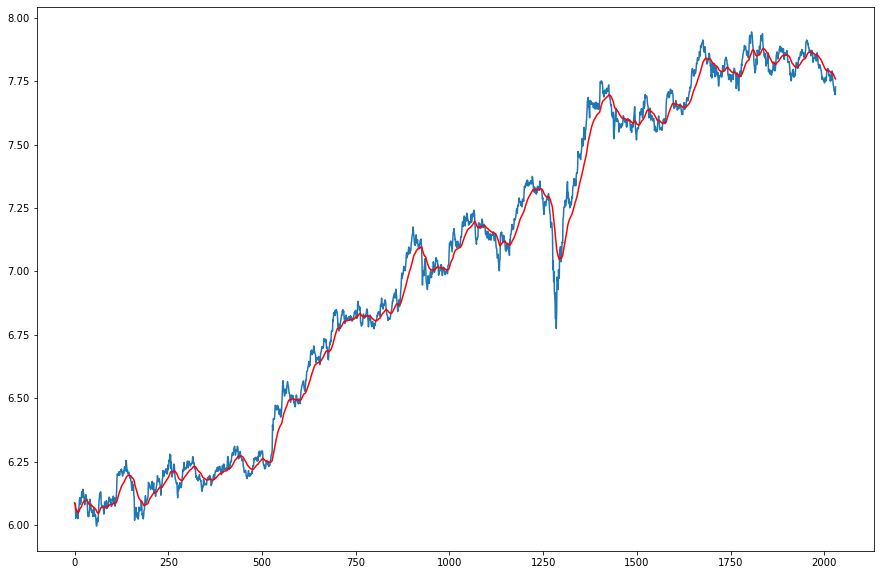

In [29]:
exp_weight_avg =pd.DataFrame.ewm(log_close, halflife=12, ignore_na=False, min_periods=0, adjust=True).mean()
plt.figure(figsize=(15,10))
plt.plot(log_close)
plt.plot(exp_weight_avg, color='red')

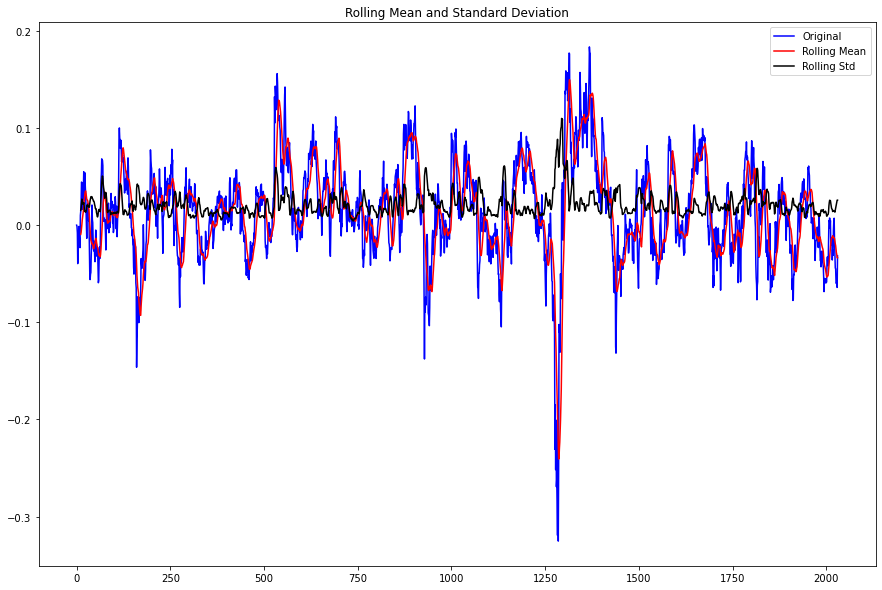

Results of dickey fuller test
Test Statistics               -7.487607e+00
p-value                        4.594770e-11
No. of lags used               1.400000e+01
Number of observations used    2.016000e+03
critical value (1%)           -3.433598e+00
critical value (5%)           -2.862975e+00
critical value (10%)          -2.567534e+00
dtype: float64


In [30]:
diff_log_weigh = log_close - exp_weight_avg
test_stationarity(diff_log_weigh)

In [31]:
log_close_diff = log_close - log_close.shift(1)
log_close_diff.dropna(inplace=True)
log_close_diff

1      -0.002650
2      -0.011014
3      -0.046447
4       0.021534
5      -0.014443
          ...   
2026   -0.017240
2027   -0.004997
2028   -0.001259
2029   -0.009877
2030    0.030622
Name: Close, Length: 2030, dtype: float64

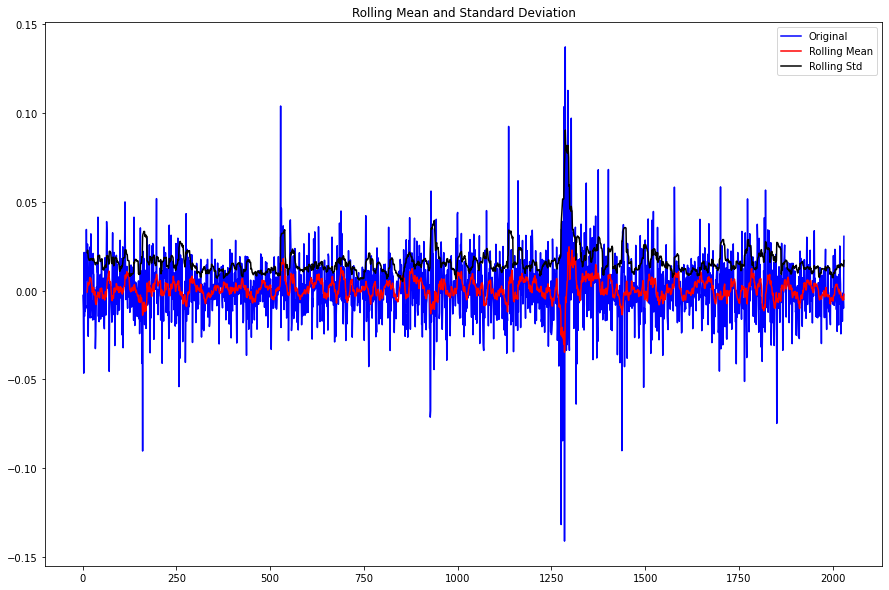

Results of dickey fuller test
Test Statistics               -1.359397e+01
p-value                        2.011639e-25
No. of lags used               1.000000e+01
Number of observations used    2.019000e+03
critical value (1%)           -3.433593e+00
critical value (5%)           -2.862973e+00
critical value (10%)          -2.567533e+00
dtype: float64


In [32]:
test_stationarity(log_close_diff)

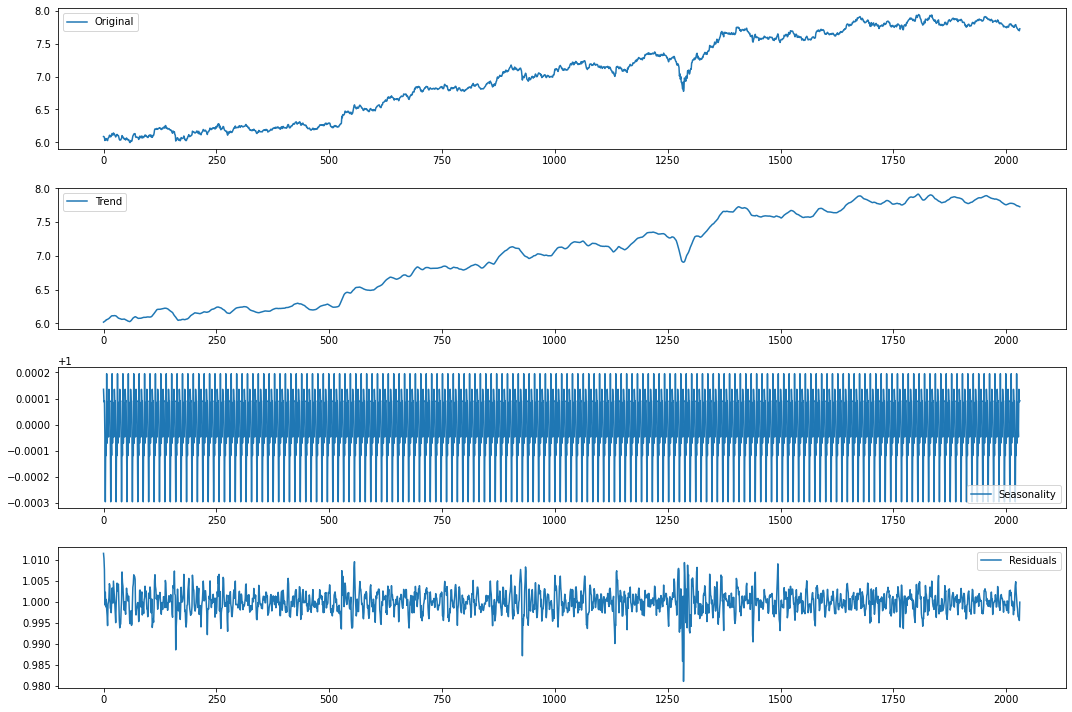

In [33]:
decomposition = smt.seasonal_decompose(log_close, model='multiplicative',extrapolate_trend='freq', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(log_close, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 1080x720 with 0 Axes>

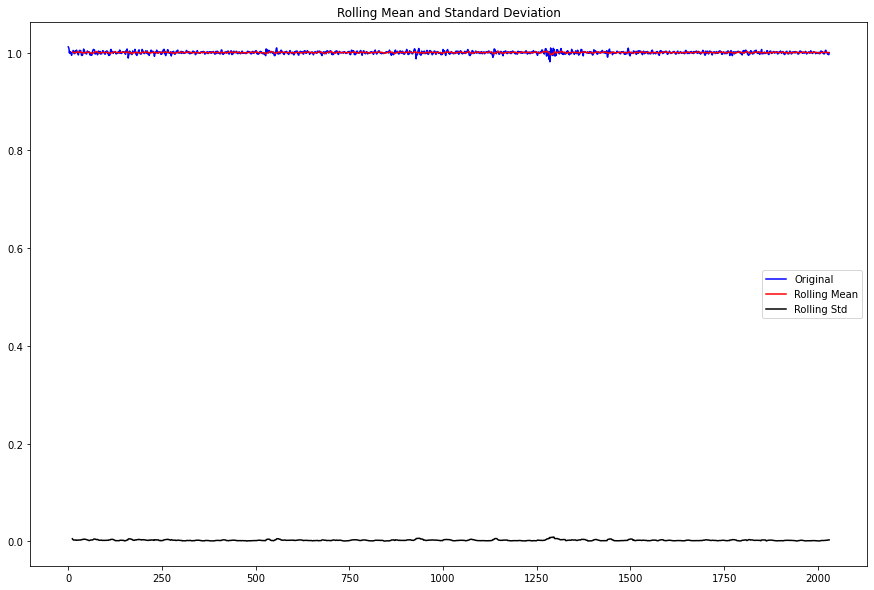

Results of dickey fuller test
Test Statistics               -1.520439e+01
p-value                        5.769949e-28
No. of lags used               2.000000e+01
Number of observations used    2.010000e+03
critical value (1%)           -3.433608e+00
critical value (5%)           -2.862979e+00
critical value (10%)          -2.567536e+00
dtype: float64


In [34]:
log_res_decomposition = residual
plt.figure(figsize=(15,10))
log_res_decomposition.dropna(inplace=True)
test_stationarity(log_res_decomposition)

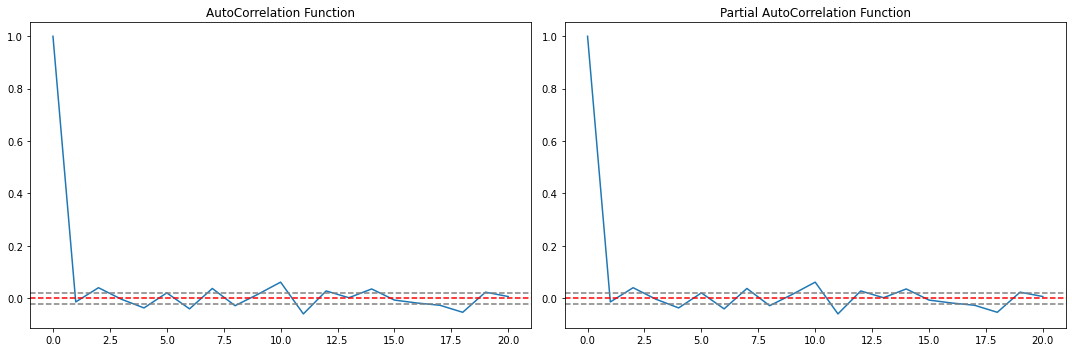

In [35]:
# ACF and PACF Plots
log_acf = acf(log_close_diff, nlags=20)
log_pacf = pacf(log_close_diff, nlags=20, method='ols')

# Plots ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y=0, linestyle = '--', color = 'red')
plt.axhline(y=0.96/np.sqrt(len(log_close_diff)), linestyle = '--', color = 'gray')
plt.axhline(y=-0.96/np.sqrt(len(log_close_diff)), linestyle = '--', color = 'gray')
plt.title('AutoCorrelation Function')

# Plots PACF
plt.subplot(122)
plt.plot(log_acf)
plt.axhline(y=0, linestyle = '--', color = 'red')
plt.axhline(y=0.96/np.sqrt(len(log_close_diff)), linestyle = '--', color = 'gray')
plt.axhline(y=-0.96/np.sqrt(len(log_close_diff)), linestyle = '--', color = 'gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

In [36]:
test_ratio = 0.25
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(stock1))
test_size = int(test_ratio * len(stock1))
print("train_size: " + str(train_size))
print("test_size: " + str(test_size))

train = stocks[:train_size]
test = stocks[train_size:]

train_size: 1523
test_size: 507


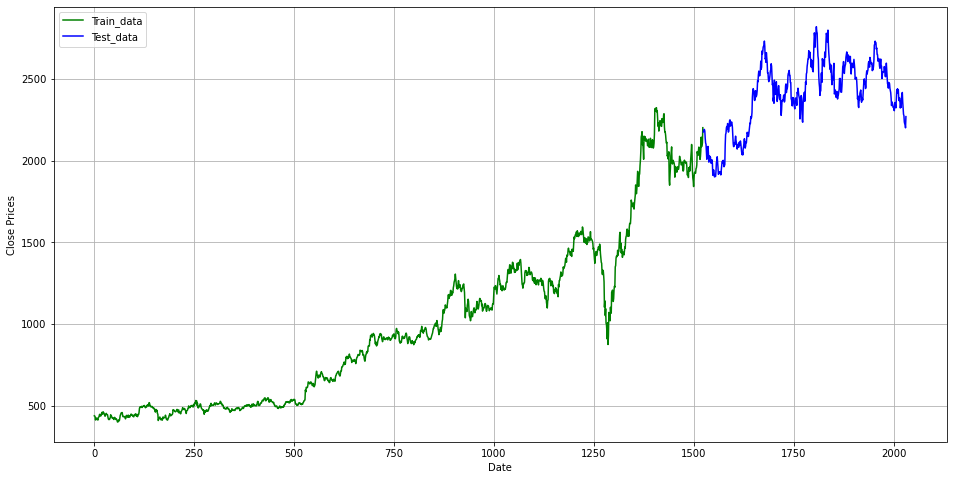

In [37]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(train['Close'], 'green', label='Train_data')
plt.plot(test['Close'], 'blue', label='Test_data')
plt.legend()

In [38]:
from pmdarima.arima import auto_arima

In [39]:
model_autoARIMA = auto_arima(train['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13797.794, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13799.782, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13799.783, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13799.828, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13801.626, Time=1.46 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.697 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1523
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6896.897
Date:                Wed, 22 Mar 2023   AIC                          13797.794
Time:                        13:52:46   BIC                          13808.450
Sample:                             0   HQIC                         13801.761
                               - 1523                                  

In [40]:
bestOrder = model_autoARIMA.order
bestOrder

(0, 1, 0)

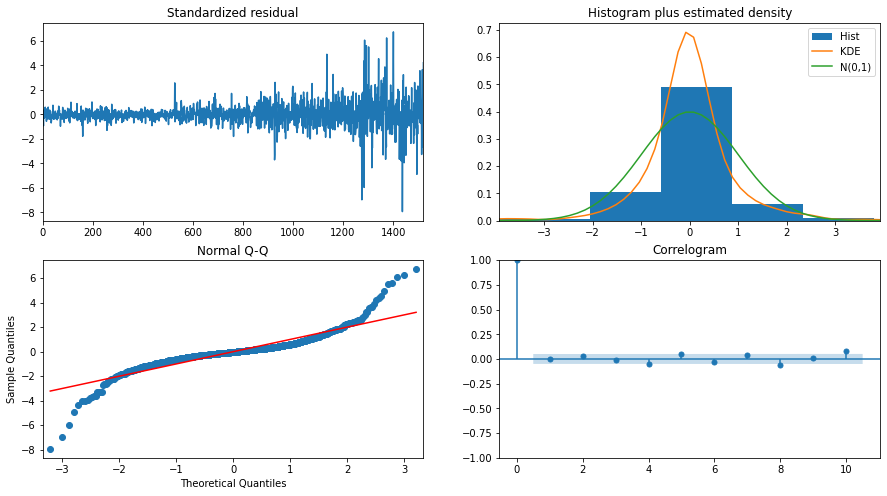

In [41]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [42]:
fitted=0
def create_final_model(train_data):
    fitted = model_autoARIMA.fit(train_data)
    print(fitted.summary())
    return fitted
fitted = create_final_model(train['Close'])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1523
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6896.897
Date:                Wed, 22 Mar 2023   AIC                          13797.794
Time:                        13:52:47   BIC                          13808.450
Sample:                             0   HQIC                         13801.761
                               - 1523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1579      0.576      2.009      0.045       0.028       2.288
sigma2       505.2548      7.000     72.178      0.000     491.535     518.975
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [43]:
predictArima = model_autoARIMA.predict(n_periods=len(stock))
predictArima = pd.DataFrame(predictArima,index = test['Close'].index,columns=['Pred_Close'])

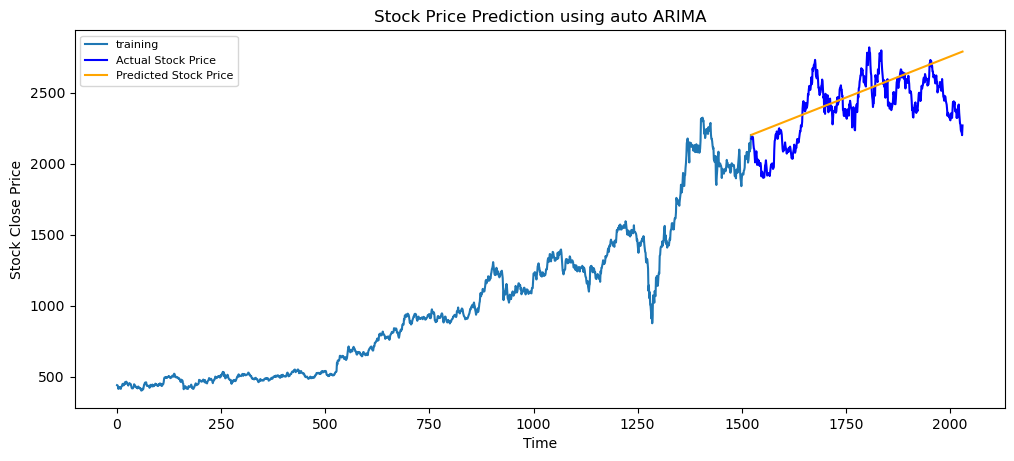

In [44]:
def plot_arima_forecasting(test):
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train['Close'], label='training')
    plt.plot(test['Close'], color = 'blue', label='Actual Stock Price')
    plt.plot(predictArima['Pred_Close'], color = 'orange',label='Predicted Stock Price')
    plt.title('Stock Price Prediction using auto ARIMA')
    plt.xlabel('Time')
    plt.ylabel('Stock Close Price')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
plot_arima_forecasting(test)

In [45]:
predictArima

Pred_Close
1523  2203.257997
1524  2204.415893
1525  2205.573790
1526  2206.731687
1527  2207.889584
...           ...
2026  2785.680044
2027  2786.837941
2028  2787.995838
2029  2789.153734
2030  2790.311631

[508 rows x 1 columns]

In [46]:
# report performance
tst_data = test['Close'].values.reshape(len(test),1)

arima_rmse = math.sqrt(mean_squared_error(tst_data, predictArima))
print('RMSE: '+str(arima_rmse))
arima_mape = np.mean(np.abs(predictArima - tst_data)/np.abs(tst_data))
print('MAPE: '+str(arima_mape.Pred_Close))

RMSE: 198.59416045303777
MAPE: 0.06919370494137297
